In [1]:
import os
import numpy as np
import cv2
from glob import glob
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from albumentations import HorizontalFlip, VerticalFlip, Rotate
import tensorflow as tf

In [2]:
# Check to create new function

def create_dir(path):
    if not os.path.exists(path):
        os.makedirs(path)


In [3]:
# Enable GPU
import os
# os.environ["CUDA_VISIBLE_DEVICES"]="1"
# tf_device='/gpu:0'
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [4]:
def load_data(path, split=0.2):
    images = sorted(glob(f"{path}/images/*.png"))   #Using sorted because we need 
    masks = sorted(glob(f"{path}/masks/*.png"))
    
    split_size = int(len(images)*split)
    train_x, test_x = train_test_split(images, test_size = split_size, random_state = 42)
    train_y, test_y = train_test_split(masks, test_size= split_size, random_state = 42)
    
    return (train_x, train_y), (test_x, test_y)
    

In [5]:

# Create Function for data augmentation

def augment_data(images, masks, save_path, augment=True):
    H = 64; W = 64;
    
    for idx, (x,y) in tqdm(enumerate(zip(images, masks)), total=len(images)):
        """ Extracting the directory"""
        
        dir_name = x.split("/")[-1].split(".")[0]
        name = dir_name.split("\\")[1]
        
        """ Read images and masks"""
        x = cv2.imread(x, cv2.IMREAD_COLOR)
        y = cv2.imread(y, cv2.IMREAD_COLOR)
        
        if augment == True:
            aug = HorizontalFlip(p=1.0)
            augmented = aug(image=x, mask=y)
            x1 = augmented["image"]
            y1 = augmented["mask"]
            
            aug = VerticalFlip(p=1)
            augmented = aug(image=x, mask=y)
            x2 = augmented["image"]
            y2 = augmented["mask"]
            
            aug = Rotate(limit=45, p=1.0)
            augmented = aug(image=x, mask = y)
            x3 = augmented["image"]
            y3 = augmented["mask"]
            
            aug = Rotate(limit=60, p=1.0)
            augmented = aug(image=x, mask = y)
            x4 = augmented["image"]
            y4 = augmented["mask"]
            
            aug = Rotate(limit=-45, p=1.0)
            augmented = aug(image=x, mask = y)
            x5 = augmented["image"]
            y5 = augmented["mask"]
            
            aug = Rotate(limit=-60, p=1.0)
            augmented = aug(image=x, mask = y)
            x6 = augmented["image"]
            y6 = augmented["mask"]
            
            X = [x,x1,x2,x3,x4,x5,x6]
            Y = [y,y1,y2,y3,y4,y5,y6]
            
        else:
            X = [x]
            Y = [y]
            
        idx = 0
        
        for i,m in zip(X,Y):
            i = cv2.resize(i,(W,H))
            m = cv2.resize(m,(W,H))
            
            m = m/255
            m = (m>0.5)*255
            
            if len(X)==1:
                tmp_image_name = f"{name}.jpg"
                tmp_mask_name = f"{name}.jpg"
                
            else:
                tmp_image_name = f"{name}_{idx}.jpg"
                tmp_mask_name = f"{name}_{idx}.jpg"
                
            image_path = os.path.join(save_path, "image/", tmp_image_name)
            mask_path = os.path.join(save_path, "mask/", tmp_mask_name)
            
            cv2.imwrite(image_path, i)
            cv2.imwrite(mask_path, m)
            
            idx += 1
            
            
        

In [6]:
# def augment_data(images, masks, save_path, augment=True):
#     H = 512; W = 512;
    
#     import tensorflow as tf
    
#     data_augmentation = tf.keras.Sequential()
#     data_augmentation.add(tf.keras.layers.RandomFlip("horizontal_and_vertical"))
#     #data_augmentation.add(tf.keras.layers.RandomRotation(0.2))
#     #data_augmentation.add(tf.keras.layers.RandomZoom(height_factor = (.05), width_factor = (.05)))
    
    
#     for idx, (x,y) in tqdm(enumerate(zip(images, masks)), total=len(images)):
#         """ Extracting the directory"""
        
#         dir_name = x.split("/")[-1].split(".")[0]
#         name = dir_name.split("\\")[1]
#         print(name)
#         """ Read images and masks"""
#         x = cv2.imread(x, cv2.IMREAD_COLOR)
#         y = cv2.imread(y, cv2.IMREAD_COLOR)
        
#         if augment == True:
#             #aug = HorizontalFlip(p=1.0)
#             #augmented = aug(image=x, mask=y)
#             x1 = data_augmentation(x, training=True)
#             y1 = data_augmentation(y, training=True)
            
# #             aug = VerticalFlip(p=1)
# #             augmented = aug(image=x, mask=y)
# #             x2 = augmented["image"]
# #             y2 = augmented["mask"]
            
#             X = [x,x1]
#             Y = [y,y1]
            
#         else:
#             X = [x]
#             Y = [y]
            
#         idx = 0
        
#         for i,m in zip(X,Y):
#             plt.imshow(i)
#             i = cv2.resize(i,(W,H))
#             m = cv2.resize(m,(W,H))
            
#             m = m/255
#             m = (m>0.5)*255
            
#             if len(X)==1:
#                 tmp_image_name = f"{name}.jpg"
#                 tmp_mask_name = f"{name}.jpg"
                
#             else:
#                 tmp_image_name = f"{name}_{idx}.jpg"
#                 tmp_mask_name = f"{name}_{idx}.jpg"
#                 print(tmp_image_name)
                
#             image_path = os.path.join(save_path, "image/", tmp_image_name)
#             mask_path = os.path.join(save_path, "mask/", tmp_mask_name)
            
#             cv2.imwrite(image_path, i)
#             cv2.imwrite(mask_path, m)
            
#             idx += 1
            
# #             

In [7]:
from pathlib import Path
import matplotlib.pyplot as plt
if __name__ == "__main__":
    data_path = Path(r"C:\Users\vanch\Downloads\dataset\dataset")
    (train_x, train_y),(test_x, test_y) = load_data(data_path, split=0.2)
    
    
    
    # create_dir("C:/Users/vanch/new_data_2/train/image/")
    # create_dir("C:/Users/vanch/new_data_2/train/mask/")
    # create_dir("C:/Users/vanch/new_data_2/test/image/")
    # create_dir("C:/Users/vanch/new_data_1/test/mask/")
    
    # augment_data(train_x,train_y, "C:/Users/vanch/new_data_2/train/", augment=True)
    # augment_data(test_x, test_y, "C:/Users/vanch/new_data_2/test/", augment=False)
    
    

In [8]:
np.shape(train_x[:544])

(544,)

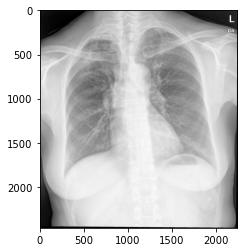

In [9]:
tryshow = cv2.imread(train_x[1])
plt.imshow(tryshow)

# Applying UNet

In [10]:
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, MaxPool2D, Conv2DTranspose, Concatenate, Input
from tensorflow.keras.models import Model


def conv_block(input, num_filters):
    x = Conv2D(num_filters, 3, padding='same')(input)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    
    x = Conv2D(num_filters, 3, padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    
    return x

def encoder_block(input, num_filters):
    x = conv_block(input, num_filters)
    p = MaxPool2D((2,2))(x)
    
    return x,p

def decoder_block(input, skip_features, num_filters):
    x = Conv2DTranspose(num_filters, (2,2), strides = 2, padding="same")(input)
    x = Concatenate()([x, skip_features])
    x = conv_block(x, num_filters)
    
    return x

def build_unet(input_shape):
    inputs = Input(input_shape)
    
    s1, p1 = encoder_block(inputs, 64)
    s2,p2 = encoder_block(p1, 128)
    s3,p3 = encoder_block(p2, 256)
    s4,p4 = encoder_block(p3, 512)
    
    b1 = conv_block(p4, 1024)
    
    d1 = decoder_block(b1, s4, 512)
    d2 = decoder_block(d1, s3, 256)
    d3 = decoder_block(d2, s2, 128)
    d4 = decoder_block(d3, s1,64)
    
    outputs = Conv2D(3,1, padding="same", activation="sigmoid")(d4)
    
    model = Model(inputs, outputs, name="U-Net")
    return model

if __name__ =="__main__":
    input_shape = (128,128,3)
    model = build_unet(input_shape)
    model.summary()

Model: "U-Net"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 128, 128, 64) 1792        input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 128, 128, 64) 256         conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 128, 128, 64) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

(64, 64, 3)

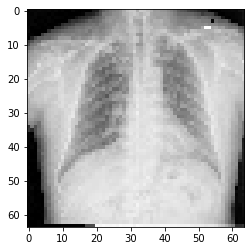

In [11]:
import matplotlib.pyplot as plt
path_ = r".\new_data_2\train\image\CHNCXR_0001_0_0.jpg"
I = cv2.imread(path_)
plt.imshow(I)
np.shape(I)

In [12]:
def load_dataset(path):
    images = sorted(glob(f"{path}/image/*.jpg"))   #Using sorted because we need 
    masks = sorted(glob(f"{path}/mask/*.jpg"))
    
    #split_size = int(len(images)*split)
    trainx= images
    trainy = masks
    
    return (trainx, trainy)

train_path = r"C:\Users\vanch\new_data_2\train"
(trainx,trainy)=load_dataset(train_path)

In [13]:
len(trainx)


3808

In [14]:
# Defining Matrix for Input Dataset

train_X = np.zeros((len(trainx),64,64,3))

for i in range(len(trainx)):
    a = cv2.imread(trainx[i])
    a = a/255;
    train_X[i,:,:,:] = a

Train_X = train_X[1:int(0.8*len(trainx)),:,:,:]
val_X = train_X[int(0.8*len(trainx)):1*len(trainx),:,:,:]


train_Y = np.zeros((len(trainy),64,64,3))

for i in range(len(trainy)):
    b = cv2.imread(trainy[i])
    b = b/255
    b = (b>0.5)
    train_Y[i,:,:,:] = b

Train_Y = train_Y[1:int(0.8*len(trainy)),:,:,:]
val_Y = train_Y[int(0.8*len(trainy)):1*len(trainy),:,:,:]


In [15]:

temp_x = train_x[:544]
type(temp_x[1])

str

In [13]:
# without augmentaion
# # for i,m in zip(X,Y):
# #             i = cv2.resize(i,(128,128))
# #             m = cv2.resize(m,(128,128))
            
# #             m = m/255
# #             m = (m>0.5)*255
# temp_x = train_x[:544]
# train_X = np.zeros((len(temp_x),64,64,3))

# for i in range(len(temp_x)):
#     a = cv2.imread(temp_x[i])
#     a = cv2.resize(a,(64,64))
#     a = a/255;
#     train_X[i,:,:,:] = a

# Train_X = train_X[1:int(0.9*len(temp_x)),:,:,:]
# val_X = train_X[int(0.9*len(temp_x)):1*len(temp_x),:,:,:]


# train_Y = np.zeros((len(train_y),64,64,3))

# for i in range(len(train_y)):
#     b = cv2.imread(train_y[i])
#     b = cv2.resize(b,(64,64))
#     b = b/255
#     b = (b>0.5)
#     train_Y[i,:,:,:] = b

# Train_Y = train_Y[1:int(0.9*len(train_y)),:,:,:]
# val_Y = train_Y[int(0.9*len(train_y)):1*len(train_y),:,:,:]

In [16]:
np.shape(val_Y)
def valid_dataset():
    return (val_X, val_Y)

In [17]:
Train_X.shape

(3045, 64, 64, 3)

In [18]:
Train_Y.shape

(3045, 64, 64, 3)

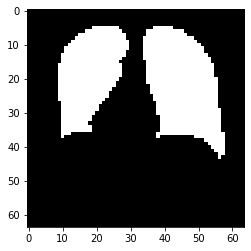

In [19]:
aa = train_Y[1,:,:,:].astype(float)
plt.imshow(aa)

In [20]:
import os
#os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"
from sklearn.utils import shuffle
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger, ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Recall, Precision, MeanIoU, Accuracy
from keras.callbacks import TensorBoard

In [21]:
def iou(y_true, y_pred):
    def f(y_true, y_pred):
        intersection = (y_true * y_pred).sum()
        union = y_true.sum() + y_pred.sum() - intersection
        x = (intersection + 1e-15) / (union + 1e-15)
        x = x.astype(np.float32)
        return x
    return tf.numpy_function(f, [y_true, y_pred], tf.float32)

smooth = 1e-15
def dice_coef(y_true, y_pred):
    y_true = tf.keras.layers.Flatten()(y_true)
    y_pred = tf.keras.layers.Flatten()(y_pred)
    intersection = tf.reduce_sum(y_true * y_pred)
    return (2. * intersection + smooth) / (tf.reduce_sum(y_true) + tf.reduce_sum(y_pred) + smooth)

def dice_loss(y_true, y_pred):
    return 1.0 - dice_coef(y_true, y_pred)

In [22]:
# import tensorflow as tf
# run_opts = tf.compat.v1.RunOptions(report_tensor_allocations_upon_oom = True)

In [23]:
Train_X.shape

(3045, 64, 64, 3)

In [24]:
H = 64; W =64;
model = build_unet((H,W,3))
metrics = [dice_coef, iou, Recall(), Precision()]

lr = 1e-4
batch_size = 1
num_epochs = 300

model.compile(loss=dice_loss, optimizer=Adam(lr), metrics=metrics)

callbacks = [
  
    ReduceLROnPlateau(monitor='val_loss', factor = 0.1, patience=2, min_lr = 1e-20, verbose=1)
 
    
]

hist = model.fit(Train_X,Train_Y,epochs= num_epochs,validation_data = valid_dataset(), shuffle=False)#callbacks=callbacks ,shuffle=False)


Epoch 1/300
96/96 [==============================] - 56s 313ms/step - loss: 0.3734 - dice_coef: 0.6264 - iou: 0.4623 - recall: 0.8501 - precision: 0.6123 - val_loss: 0.4974 - val_dice_coef: 0.5024 - val_iou: 0.3358 - val_recall: 0.7787 - val_precision: 0.6641
Epoch 2/300
96/96 [==============================] - 22s 225ms/step - loss: 0.2903 - dice_coef: 0.7091 - iou: 0.5507 - recall: 0.8670 - precision: 0.6977 - val_loss: 0.4010 - val_dice_coef: 0.5988 - val_iou: 0.4280 - val_recall: 0.6673 - val_precision: 0.7257: 0.7097 - iou: 0.5512 - recall: 0.8665 -
Epoch 3/300
96/96 [==============================] - 21s 223ms/step - loss: 0.2695 - dice_coef: 0.7299 - iou: 0.5761 - recall: 0.8616 - precision: 0.7156 - val_loss: 0.3307 - val_dice_coef: 0.6691 - val_iou: 0.5036 - val_recall: 0.7203 - val_precision: 0.7337
Epoch 4/300
96/96 [==============================] - 22s 228ms/step - loss: 0.2540 - dice_coef: 0.7454 - iou: 0.5955 - recall: 0.8586 - precision: 0.7289 - val_loss: 0.3315 - val_

KeyboardInterrupt: 

In [ ]:
#model.save('model_Xray_segment.h5')

In [ ]:
# new_model = tf.keras.models.load_model('model_Xray_segment.h5')
# from keras.utils.generic_utils import get_custom_objects

# get_custom_objects().update({'my_custom_func': my_custom_func})

In [53]:
loss_per_epoch = hist.history['loss']

In [35]:
# accuracy_per_epoch = model.history.history['Accuracy']
# plt.plot(accuracy_per_epoch)
# plt.xlabel('Number of epochs'); plt.ylabel('Training accuracy')

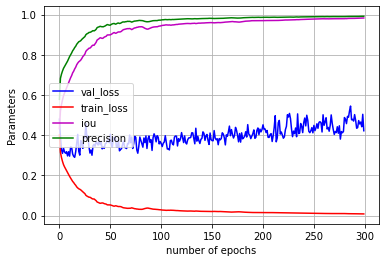

In [54]:
val_loss_per_epoch = hist.history['val_loss']
plt.plot(val_loss_per_epoch, color='blue', label='val_loss')
plt.plot(loss_per_epoch,color='red', label='train_loss')
plt.plot(hist.history['iou'], c = 'm', label='iou')
plt.plot(hist.history['precision_2'], c='g', label='precision')
plt.xlabel("number of epochs"); plt.ylabel("Parameters")
plt.legend()
plt.grid()

In [55]:
def load_dataset(path):
    images = sorted(glob(f"{path}/image/*.jpg"))   #Using sorted because we need 
    masks = sorted(glob(f"{path}/mask/*.jpg"))
    
    #split_size = int(len(images)*split)
    test_x= images
    test_y = masks
    
    return (test_x, test_y)

test_path = r"C:\Users\vanch\new_data\test"
(test_x,test_y)=load_dataset(test_path)

In [56]:
print(len(test_y))

160


In [57]:
# Defining Matrix for Input Dataset

Test_X = np.zeros((len(test_x),64,64,3))

for i in range(len(test_x)):
    a = cv2.imread(test_x[i])
    #a = cv2.resize(a,(64,64,3))
    a = a/255
    Test_X[i,:,:,:] = a

# Train_X = train_X[1:int(0.8*len(trainx)),:,:,:]
# val_X = train_X[int(0.8*len(trainx)):1*len(trainx),:,:,:]


Test_Y = np.zeros((len(test_y),64,64,3))

for i in range(len(test_y)):
    b = cv2.imread(test_y[i])
    #b = cv2.resize(b,(64,64,3))
    b=b/255
    Test_Y[i,:,:,:] = b

# Train_Y = train_Y[1:int(0.8*len(trainy)),:,:,:]
# val_Y = train_Y[int(0.8*len(trainy)):1*len(trainy),:,:,:]
print(len(Test_X), len(Test_Y))

160 160


In [58]:
score = model.evaluate(Test_X, Test_Y, verbose = 0)
print("the dice loss is", score[0])
print("the dice coeff is", score[1])
print("the IoU is", score[2])
print("the recall is", score[3])
print("the precision is", score[4])

the dice loss is 0.2996451258659363
the dice coeff is 0.700354814529419
the IoU is 0.5420588850975037
the recall is 0.5136750936508179
the precision is 0.8433679938316345


In [35]:
len(Test_X[:25])

25

  0%|          | 0/35 [00:00<?, ?it/s]

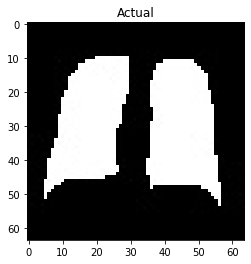

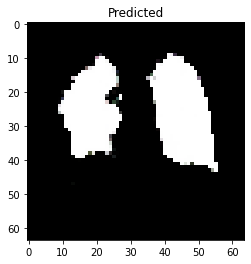

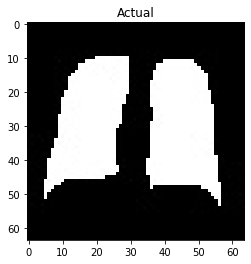

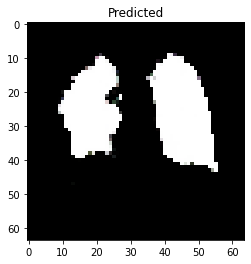

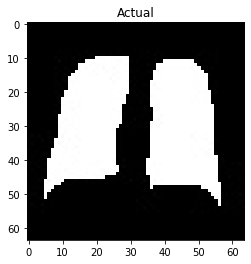

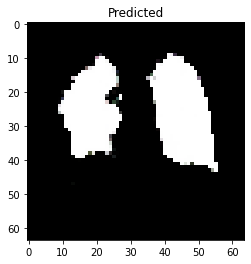

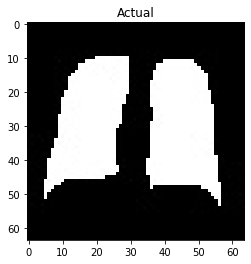

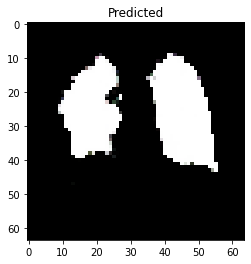

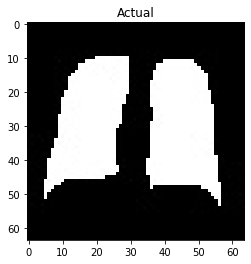

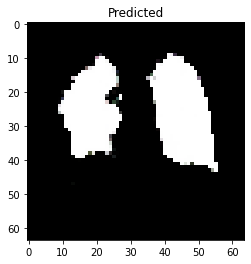

100%|██████████| 35/35 [00:01<00:00, 19.30it/s]


In [59]:
fig = plt.figure(1)#, figsize=(20,10))
count = 1
from tqdm import tqdm
for k in tqdm(range(1,len(Test_X[:36]))):
    while count<10:
        #plt.subplot(6,6,count)
        plt.figure(k)
        testing_X = Test_X[k].reshape(1,64,64,3)
        pred = model.predict(testing_X)[0]
        plt.imshow(Test_Y[k])
        plt.title("Actual")
        plt.show()
        plt.figure(k+1)
        #plt.subplot(6,6,count+1)
        plt.imshow(pred);
        plt.title("Predicted")
        plt.show()
        #fig.tight_layout()
        count += 2
        

    
    


In [ ]:
len(Test_X[:10])

# Prediction

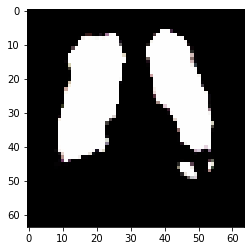

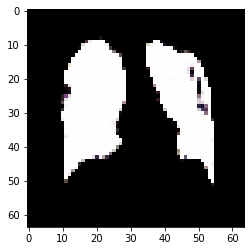

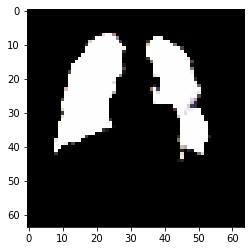

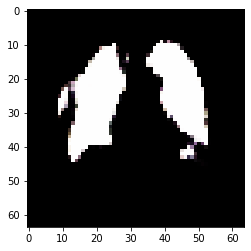

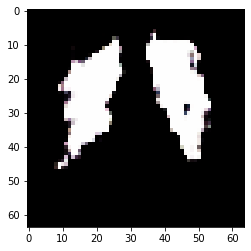

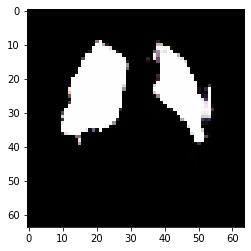

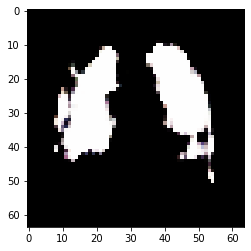

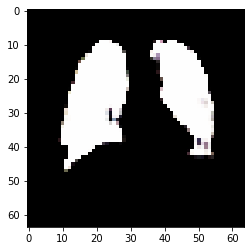

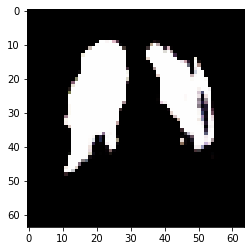

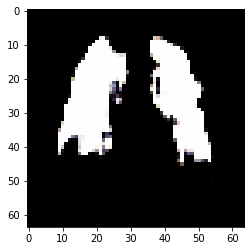

In [38]:
# Predict and Save to the path

import cv2
create_dir('./predicted_data22')
for p in range(len(Test_X[:10])):
    testing_X = Test_X[p].reshape(1,64,64,3)
    
    pred_d = model.predict(testing_X)[0]
  #  pred_d = np.squeeze(pred_d, axis=-1)  # it will convert it to height and width
#     pred_d = pred_d > 0.5
    pred_d = pred_d.astype(np.float32)
    plt.imshow(pred_d, cmap='bone')
    
    name_out = "./predicted_data22/" + "predicted_"  + str(p) + ".jpg"
    out_p = cv2.imwrite(name_out, pred_d)
    plt.savefig(name_out)
    plt.show()
    
    